In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
mat_path = (r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\Neurociencias-2025-1\BCT\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat")
data = scipy.io.loadmat(mat_path)

In [5]:
# Para los datos de 'Coactivation_matrix.mat', filtre la matriz para que, para cada nodo, se mantenga aquel nodo con mayor comunicación
dict = {k: v for k, v in data.items() if k[0] != '_'}
df_mat = pd.DataFrame(dict['Coactivation_matrix']) # filtrado matriz

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


In [6]:
G = nx.from_pandas_adjacency(df_mat, create_using = nx.DiGraph)

In [12]:
# filtrar para cada nodo, el bodo con mayor comuynicación
edges_to_remove = []
for node in G.nodes():
    edges = G[node] # vecinos del nodo
    if edges:
        nodo_destino_max = max(edges.items(), key = lambda x: x[1]['weight'])[0]
        for nodo_destino in list(edges.keys()):
            if nodo_destino != nodo_destino_max:
                edges_to_remove.append((node, nodo_destino))

G.remove_edges_from(edges_to_remove)

In [29]:
coords = dict['Coord'] 
for i, node in enumerate(G.nodes()):
    G.nodes[node]['coord'] = coords[i]  

for node in list(G.nodes())[:5]:  
    print(f"Nodo {node}: {G.nodes[node]['coord']}")

Nodo 0: [ 7.24363636 37.01090909  9.42545455]
Nodo 1: [ 7.98653199 46.22222222 15.60942761]
Nodo 2: [ 7.55725191 33.83206107 23.51145038]
Nodo 3: [ 9.11587983 22.45493562 24.20600858]
Nodo 4: [ 8.90243902 36.18699187 -0.31707317]


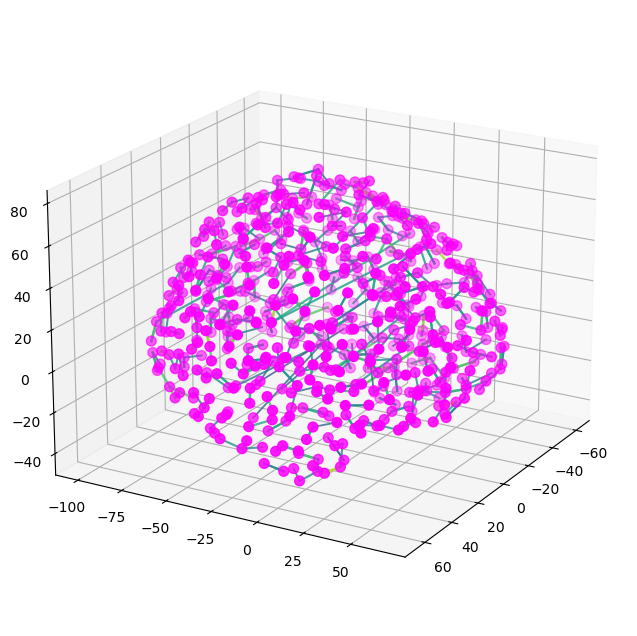

In [30]:
# Con el nuevo arreglo muestre los nodos y vértices del grafo
mat_adj = nx.to_numpy_array(G)
x_coords = np.array([G.nodes[node]['coord'][0] for node in G.nodes()])
y_coords = np.array([G.nodes[node]['coord'][1] for node in G.nodes()])
z_coords = np.array([G.nodes[node]['coord'][2] for node in G.nodes()])

max_weight = np.max(mat_adj) if np.max(mat_adj) > 0 else 1
normalised_weight = mat_adj / max_weight
colormap = cm.viridis

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(x_coords, y_coords, z_coords, color='magenta', s=50)
for i in range(len(mat_adj)):
    for j in range(len(mat_adj)):
        weight = mat_adj[i, j]
        if weight > 0:  
            color = colormap(normalised_weight[i, j])
            ax.plot(
                [x_coords[i], x_coords[j]],
                [y_coords[i], y_coords[j]],
                [z_coords[i], z_coords[j]],
                color = color, alpha = 0.8, lw = 1 + 3 * weight
            )
ax.view_init(elev=20., azim=30)
plt.show()